https://lloydrochester.com/post/c/convolution/

In [31]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

## get sample noisy data set

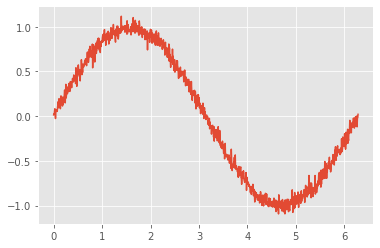

In [11]:
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x) + np.random.normal(0,0.05,1000)
plt.plot(x, y)

## numpy convolution

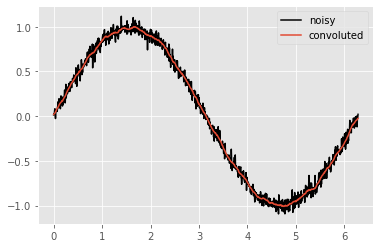

In [28]:
smoothing_size = 20 # convolution smoothing size
np_conv = np.convolve(y, np.ones(smoothing_size), 'same') / smoothing_size

plt.plot(x, y, label='noisy', color='black')
plt.plot(x, np_conv, label='convoluted')
plt.legend()

## C like convolution

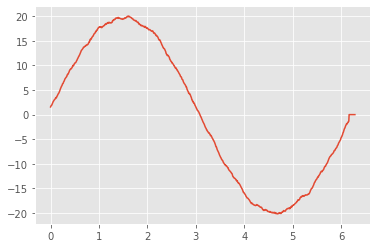

In [24]:
c_conv = np.zeros(1000)
smoothing_window = np.ones(smoothing_size)
for i in range(len(y) - smoothing_size):
    for ii in range(smoothing_size):
        c_conv[i] = c_conv[i] + y[ii + i] * smoothing_window[smoothing_size - 1 - ii]
        
plt.plot(x, c_conv)

## sample signal for derivative impl testing

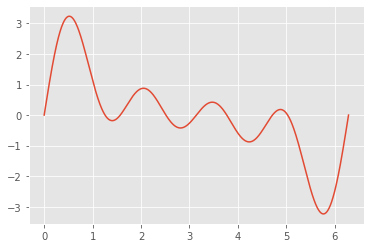

In [47]:
grad_test_sig = np.sum([np.sin(x*i) for i in range(5)], axis=0)
plt.plot(x, grad_test_sig)

## numpy gradient

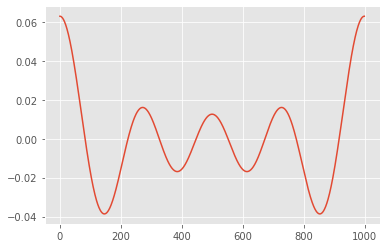

In [48]:
np_grad = np.gradient(grad_test_sig)
plt.plot(np_grad)

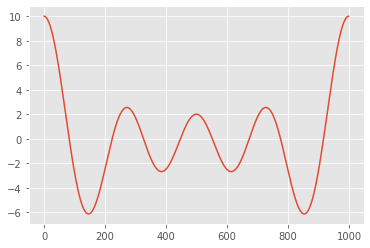

In [53]:
plt.plot(np.diff(grad_test_sig) / np.diff(x))

## C like derivative

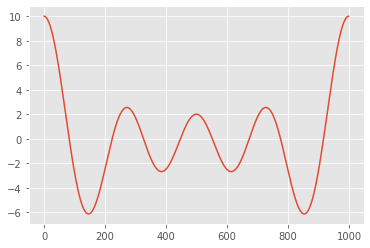

In [56]:
c_der = np.zeros(len(x) - 1)
for i in range(len(x) - 1):
    c_der[i] = (grad_test_sig[i+1] - grad_test_sig[i]) / (x[i+1] - x[i])
plt.plot(c_der)